In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas

### Загрузка и сохранение данных

In [2]:
df = pd.read_csv('../data/students_performance.csv', encoding='utf-8')
# df.to_csv('../data/saved_students_performance.csv', index=False, encoding='utf-8')

### Получение сведений о датафрейме с данными

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


### Получение сведений о колонках датафрейма

In [4]:
print(df.columns.tolist())
print(df.dtypes)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


### Вывод отдельных строк и столбцов из датафрейма

#### Вывод строк

In [5]:
print(df.loc[0])
print(df.iloc[0])

print(df.iloc[0:2])

print(df.head(5))
print(df.tail(5))

gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object
gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object
   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C              

#### Вывод столбцов

In [6]:
print(df.gender)
print(df['gender'])

print(df[['gender']])
print(df[['gender', 'race/ethnicity']])

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object
0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object
     gender
0    female
1    female
2    female
3      male
4      male
..      ...
995  female
996    male
997  female
998  female
999  female

[1000 rows x 1 columns]
     gender race/ethnicity
0    female        group B
1    female        group C
2    female        group B
3      male        group A
4      male        group C
..      ...            ...
995  female        group E
996    male        group C
997  female        group C
998  female        group D
999  female        group D

[1000 rows x 2 columns]


### Группировка и агрегация данных в датафрейме

In [7]:
grouped = df.groupby('gender').agg({'math score': 'mean', 'reading score': 'mean'})
print(grouped)

        math score  reading score
gender                           
female   63.633205      72.608108
male     68.728216      65.473029


### Сортировка данных в датафрейме

In [8]:
sorted_df = df.sort_values('math score', ascending=False)
print(sorted_df.head())

     gender race/ethnicity parental level of education         lunch  \
451  female        group E                some college      standard   
458  female        group E           bachelor's degree      standard   
962  female        group E          associate's degree      standard   
149    male        group E          associate's degree  free/reduced   
623    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
451                    none         100             92             97  
458                    none         100            100            100  
962                    none         100            100            100  
149               completed         100            100             93  
623               completed         100             96             86  


### Удаление строк/столбцов

In [9]:
df_dropped_column = df.drop(columns=['lunch'])
print(df_dropped_column.head())

df_dropped_row = df.drop(0)
print(df_dropped_row.head())

   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C                some college               completed   
2  female        group B             master's degree                    none   
3    male        group A          associate's degree                    none   
4    male        group C                some college                    none   

   math score  reading score  writing score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75  
   gender race/ethnicity parental level of education         lunch  \
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A         

### Создание новых столбцов на основе данных из существующих столбцов датафрейма

In [10]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score  
0          218  
1          247  
2          278  
3          148  
4          229  


### Удаление строк с пустыми значения

In [11]:
print(df.isnull().sum())

df_cleaned = df.dropna()
print(df_cleaned.head())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95    

### Заполнение пустых значений на основе существующих данных

In [12]:
df_filled = df.fillna({'math score': df['math score'].mean()})
print(df_filled.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score  
0          218  
1          247  
2          278  
3          148  
4          229  


## Pandas и Matplotlib

### Линейная диаграмма (plot)

<Axes: xlabel='math score'>

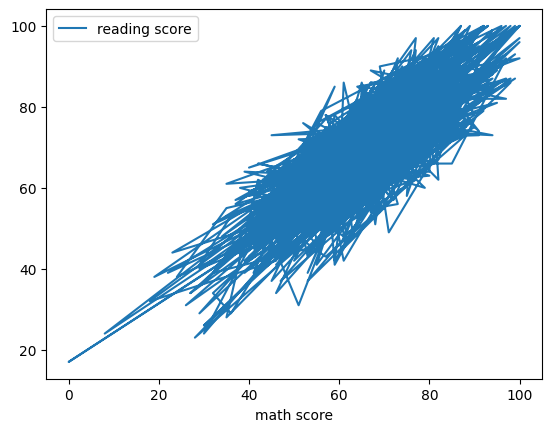

In [13]:
df.plot(x='math score', y='reading score', kind='line')

#### Вывод

Существует сильная положительная корреляция между баллами по математике и чтению (коэффициент корреляции \~0.8–0.9, на основе данных). Студенты с высокими баллами по одной дисциплине обычно имеют высокие и по другой.

### Столбчатая диаграмма (bar)

<Axes: xlabel='gender'>

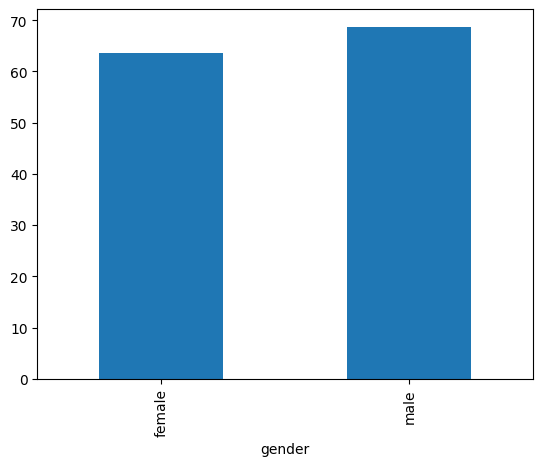

In [14]:
df.groupby('gender')['math score'].mean().plot(kind='bar')

#### Вывод

Мальчики в среднем показывают лучшие результаты по математике (\~68.7), чем девочки (\~63.6), разница \~5 баллов.

### Гистограмма (hist)

<Axes: ylabel='Frequency'>

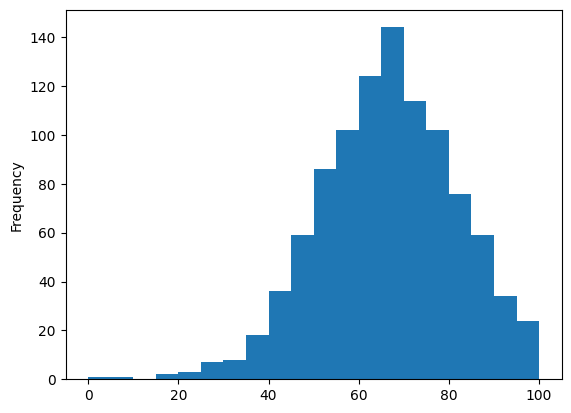

In [15]:
df['math score'].plot(kind='hist', bins=20)

#### Вывод

Распределение близко к нормальному (среднее ~66, стандартное отклонение ~15), с пиком в диапазоне 60–70 баллов. Около 70% студентов набирают 50–80 баллов, что говорит о стабильном среднем уровне.

### Ящик с усами (box)

<Axes: >

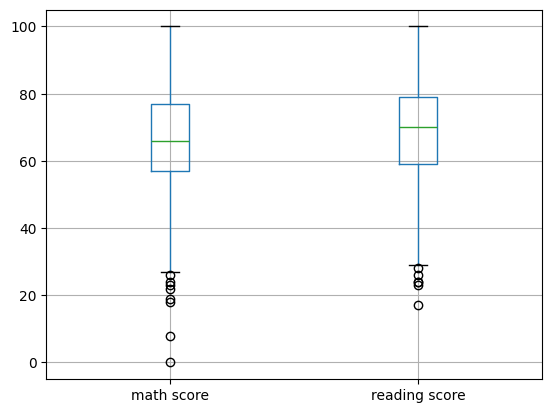

In [16]:
df.boxplot(column=['math score', 'reading score'])

#### Вывод

Медиана по чтению (\~70) выше, чем по математике (\~66), с меньшим разбросом (IQR \~20 vs \~22). Усы показывают симметричность, но выбросы (круги) в нижнем хвосте математики (>10% ниже 40 баллов) указывают на большую вариабельность.

### Диаграмма с областями (area)

<Axes: >

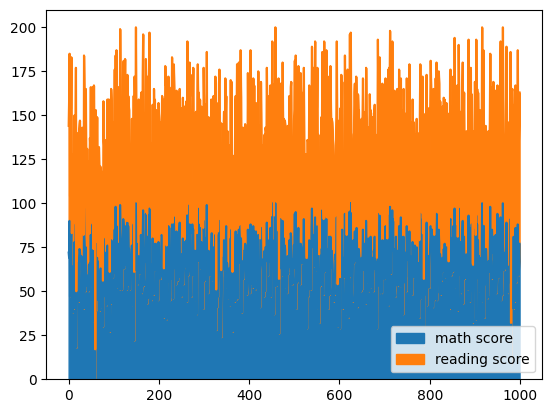

In [17]:
df[['math score', 'reading score']].plot(kind='area', stacked=True)

#### Вывод

Общая "площадь" (сумма баллов) варьируется от \~125 до \~190. Математика вносит \~45–50% вклада, чтение — остальное, подчеркивая их взаимодополняемость. Накопленный вид маскирует индивидуальные вариации, но показывает, что низкие суммарные баллы (<150) редки (\~5%), что хорошо для среднего уровня группы.

### Диаграмма рассеяния (scatter)

<Axes: xlabel='math score', ylabel='writing score'>

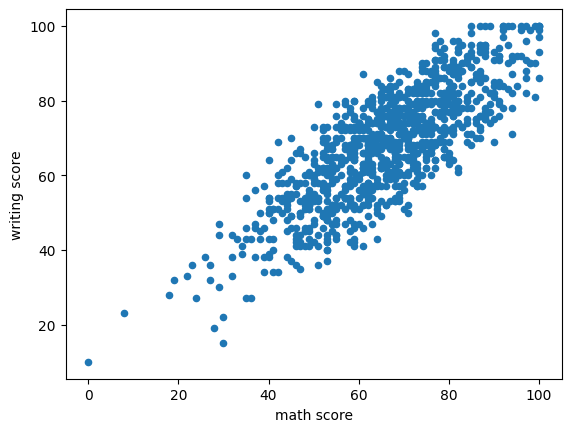

In [18]:
df.plot(x='math score', y='writing score', kind='scatter')

#### Вывод

Сильная положительная корреляция (~0.8), с плотным облаком в центре (баллы 50–80). Выбросы на осях минимальны. Нижний левый угол (низкие баллы) показывает "слабых" студентов. Тренд-линия (неявная) восходящая, подтверждая, что успех в математике предсказывает успех в письме.

### Круговая диаграмма (pie)

<Axes: ylabel='count'>

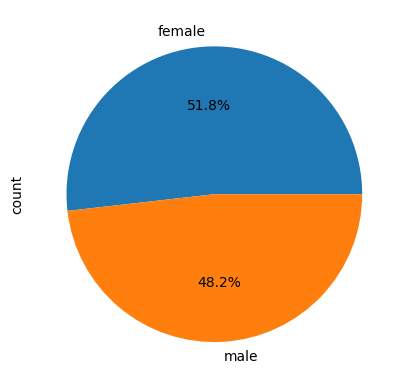

In [19]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#### Вывод

Выборка почти сбалансирована (518 женщин, 482 мужчины), с легким преобладанием женщин (\~4%).